# **Customer Churn Prediction For SyriaTel**

## **Stakeholders And Main Problem**

Our stakeholder is SyriaTel, a telecommunications company. The goal of this project is to provide SyriaTel with insights into the key factors contributing to customer churn and to build a predictive model that identifies customers at risk of leaving. This will enable SyriaTel to take proactive steps to retain customers and reduce revenue loss.


## **Project Objectives**


This project aims to achieve the following:

1. Develop a Churn Prediction Model-
 Build an effective classification model to predict customer churn for SyriaTel.
2. Evaluate Model Performance -
Assess the model's effectiveness using appropriate metrics for imbalanced data (e.g., Precision, Recall, F1-Score, ROC AUC).
3. Identify Key Churn Drivers -
 Determine which customer attributes and behaviors are most significant in predicting churn.
4. Propose Actionable Retention Strategies - 
Formulate data-driven recommendations for SyriaTel to reduce customer attrition.

## **Key Business Questions**

To address the overarching business problem, this project will seek to answer the following key questions:

1. Which customers are most likely to churn in the near future?
2. What characteristics or behaviors differentiate customers who churn from those who don't?
3. How effectively can we predict churn before it happens, and what are the trade-offs of our predictions?
4. How can insights from this model inform our customer retention strategies to reduce revenue loss for SyriaTel?

## **Data Understanding And Preparation**

The dataset for this project contains over 3,000 customer records from SyriaTel, a telecommunications provider. Each row represents an individual customer and includes attributes such as demographics, service subscriptions, usage patterns, and customer support interactions. The target variable is “Churn,” indicating whether a customer has discontinued the service. Data was provided in a single CSV file. Initial cleaning involved handling missing values, correcting data types, and encoding categorical variables. Further exploration and feature engineering were performed within the same notebook to prepare the data for modeling.


## **Import Dataset**

Dataset located at :

[Kaggle](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset) and imported as a CSV file. It contains over 3,000 records of customer attributes and churn behavior.


### **Load Dependencies**

In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline








In [6]:
#Load the data
df = pd.read_csv('data/churn.csv')


# Preview the first few rows
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## **Data Understanding**

Let's begin the Data Understanding phase by exploring the dataset.

In [7]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [8]:
# Display descriptive statistics for numerical columns
display(df.describe())

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [9]:
# Display the distribution of the 'churn' variable
display(df['churn'].value_counts())

churn
False    2850
True      483
Name: count, dtype: int64

This indicates that our dataset is imbalanced, with significantly more non-churned customers than churned customers. This is an important finding that we'll need to consider during the Modeling and Evaluation phases.

In [10]:
# Display the distribution of categorical columns
print("Distribution of 'state':")
display(df['state'].value_counts())

print("\nDistribution of 'area code':")
display(df['area code'].value_counts())

print("\nDistribution of 'international plan':")
display(df['international plan'].value_counts())

print("\nDistribution of 'voice mail plan':")
display(df['voice mail plan'].value_counts())

Distribution of 'state':


state
WV    106
MN     84
NY     83
AL     80
OH     78
WI     78
OR     78
WY     77
VA     77
CT     74
ID     73
MI     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
NJ     68
NC     68
MT     68
WA     66
CO     66
NV     66
MS     65
MA     65
RI     65
AZ     64
MO     63
FL     63
NM     62
ME     62
ND     62
OK     61
NE     61
DE     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: count, dtype: int64


Distribution of 'area code':


area code
415    1655
510     840
408     838
Name: count, dtype: int64


Distribution of 'international plan':


international plan
no     3010
yes     323
Name: count, dtype: int64


Distribution of 'voice mail plan':


voice mail plan
no     2411
yes     922
Name: count, dtype: int64

- We have now explored the distribution of the categorical variables: 
'state', 'area code', 'international plan', and 'voice mail plan'.
- The 'state' column shows a wide distribution across many states, with some states having slightly more entries than others.
- 'area code' is concentrated in three main area codes (415, 510, and 408).
- 'international plan' and 'voice mail plan' show that most customers do not have these plans. This imbalance in these features could be significant when we analyze their relationship with churn.

### **Relationship Between Categorical Features And Churn**

In [11]:
# Relationship between 'international plan' and 'churn'
print("Churn rate by 'international plan':")
display(df.groupby('international plan')['churn'].value_counts(normalize=True).unstack())

# Relationship between 'voice mail plan' and 'churn'
print("\nChurn rate by 'voice mail plan':")
display(df.groupby('voice mail plan')['churn'].value_counts(normalize=True).unstack())

Churn rate by 'international plan':


churn,False,True
international plan,,
no,0.885050,0.114950
yes,0.575851,0.424149



Churn rate by 'voice mail plan':


churn,False,True
voice mail plan,,
no,0.832849,0.167151
yes,0.913232,0.086768


The output shows the churn rates for customers with and without international plans and voice mail plans.

- International Plan: Customers with an international plan have a significantly higher churn rate (42.4%) compared to those without an international plan (11.5%). This suggests that having an international plan is a strong indicator of churn.
- Voice Mail Plan: Customers with a voice mail plan have a lower churn rate (8.7%) compared to those without a voice mail plan (16.7%). This indicates that having a voice mail plan might be associated with lower churn.These are important findings for understanding which customer segments are more likely to churn.

### **Churn Rate By International Plan And Voice Mail Plan**

C:\Users\Admin\AppData\Local\Temp\ipykernel_1752\1448719196.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='international plan', y='churn', data=df, ci=None)


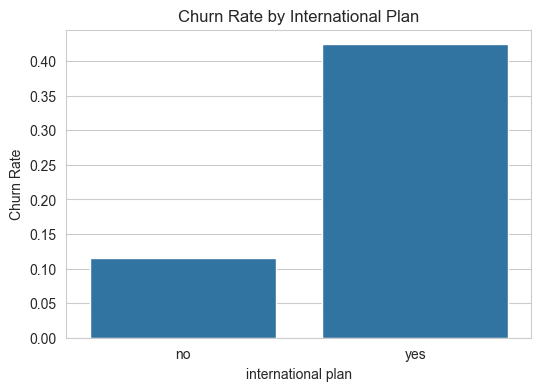

C:\Users\Admin\AppData\Local\Temp\ipykernel_1752\1448719196.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='voice mail plan', y='churn', data=df, ci=None)


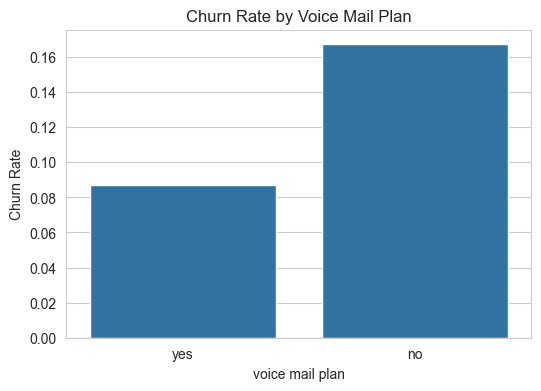

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style for plots
sns.set_style("whitegrid")

# Plot churn rate by 'international plan'
plt.figure(figsize=(6, 4))
sns.barplot(x='international plan', y='churn', data=df, ci=None)
plt.title('Churn Rate by International Plan')
plt.ylabel('Churn Rate')
plt.show()

# Plot churn rate by 'voice mail plan'
plt.figure(figsize=(6, 4))
sns.barplot(x='voice mail plan', y='churn', data=df, ci=None)
plt.title('Churn Rate by Voice Mail Plan')
plt.ylabel('Churn Rate')
plt.show()

OBSERVATION:

The analysis of churn rates based on 'international plan' and 'voice mail plan' reveals significant differences:

- International Plan: Customers with an international plan exhibit a substantially higher churn rate (around 42.4%) compared to those without an international plan (approximately 11.5%). This highlights having an international plan as a strong indicator of increased churn risk.
- Voice Mail Plan: Conversely, customers with a voice mail plan show a lower churn rate (around 8.7%) than those without a voice mail plan (approximately 16.7%). This suggests that the voice mail plan might be associated with higher customer retention.
- These observations indicate that both 'international plan' and 'voice mail plan' are likely important features for predicting customer churn and should be carefully considered in the modeling phase.

### **Relationship Between State And Area Code**

In [13]:
# Relationship between 'state' and 'churn'
print("Churn rate by 'state':")
display(df.groupby('state')['churn'].value_counts(normalize=True).unstack())

# Relationship between 'area code' and 'churn'
print("\nChurn rate by 'area code':")
display(df.groupby('area code')['churn'].value_counts(normalize=True).unstack())

Churn rate by 'state':


churn,False,True
state,,
AK,0.942308,0.057692
AL,0.900000,0.100000
AR,0.800000,0.200000
AZ,0.937500,0.062500
CA,0.735294,0.264706
CO,0.863636,0.136364
CT,0.837838,0.162162
DC,0.907407,0.092593
DE,0.852459,0.147541



Churn rate by 'area code':


churn,False,True
area code,,
408,0.854415,0.145585
415,0.857402,0.142598
510,0.851190,0.148810


We have now examined the churn rates by state and area code.

- Looking at the churn rate by 'state', we can see that there is variation across states, with some states having higher or lower churn rates than the overall average. This suggests that geographical location might play a role in churn, although it could also be influenced by other factors correlated with state.

- For 'area code', the churn rates are relatively similar across the three area codes. This indicates that 'area code' might not be as strong a predictor of churn as 'international plan' or 'voice mail plan'.

### **Top 10 States With Highest Churn Rate**

C:\Users\Admin\AppData\Local\Temp\ipykernel_1752\4220305528.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_churn_states.index, y=True, data=top_10_churn_states, palette='viridis')


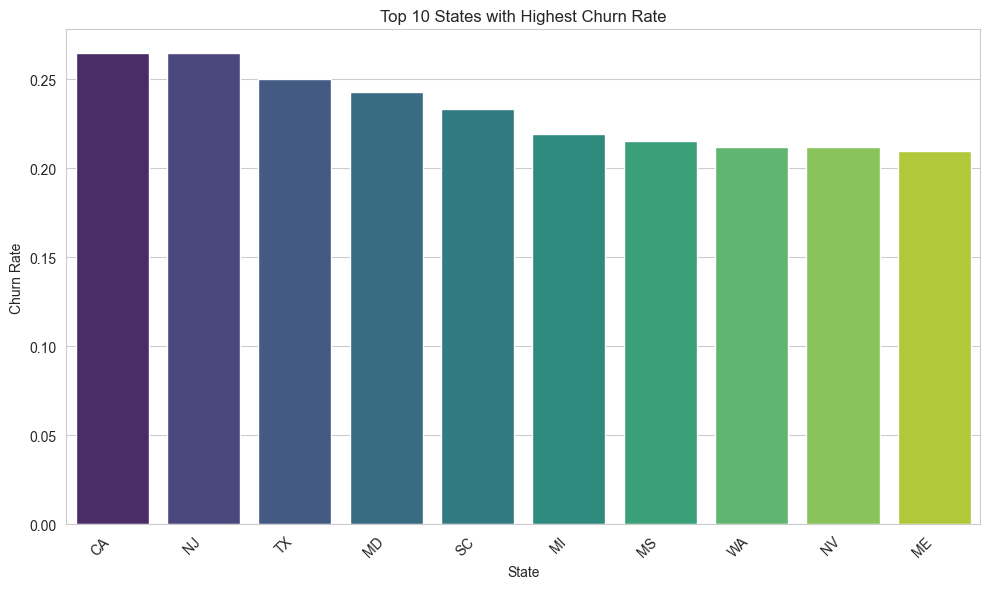

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate churn rate by state
state_churn = df.groupby('state')['churn'].value_counts(normalize=True).unstack()

# Calculate and sort states by churn rate (True column)
state_churn[True] = state_churn[True].fillna(0) # Fill NaN with 0 for states with no churn
top_10_churn_states = state_churn.sort_values(by=True, ascending=False).head(10)

# Plot churn rate for the top 10 states
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_churn_states.index, y=True, data=top_10_churn_states, palette='viridis')
plt.title('Top 10 States with Highest Churn Rate')
plt.xlabel('State')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45, ha='right') # Rotate state names for readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

OBSERVATION:

The bar plot displaying the top 10 states with the highest churn rates reveals that certain states experience significantly higher customer attrition compared to the overall average. Notably, states like **California (CA)** and **New Jersey (NJ)** show the highest churn rates, followed closely by **Texas (TX)** and **Maryland (MD)**. This visualization underscores the geographical variation in churn and identifies specific states where SyriaTel might need to investigate local factors or focus targeted retention campaigns. While the 'state' variable on its own might not be the strongest single predictor due to the number of categories and varying sample sizes per state, identifying these high-churn states provides actionable geographical insights for the business.

### **Churn Rate By Area Code**

C:\Users\Admin\AppData\Local\Temp\ipykernel_1752\486343532.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='area code', y='churn', data=df, ci=None)


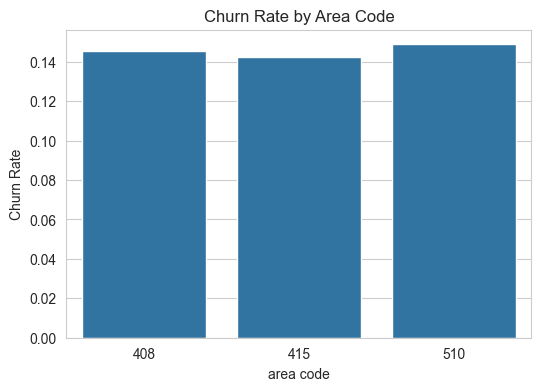

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style for plots
sns.set_style("whitegrid")

# Plot churn rate by 'area code'
plt.figure(figsize=(6, 4))
sns.barplot(x='area code', y='churn', data=df, ci=None)
plt.title('Churn Rate by Area Code')
plt.ylabel('Churn Rate')
plt.show()

As we observed earlier from the value counts, the churn rates are quite similar across the three area codes (408, 415, and 510). The plot visually confirms this – the bars are roughly at the same height, indicating that area code doesn't appear to be a strong predictor of churn on its own

 ### **Relationship Between Numerical Features And Churn**

In [16]:
# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Display the correlation of numerical features with 'churn'
print("Correlation with 'churn':")
display(correlation_matrix['churn'].sort_values(ascending=False))

Correlation with 'churn':


churn                     1.000000
customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
total eve charge          0.092786
total intl charge         0.068259
total intl minutes        0.068239
total night charge        0.035496
total night minutes       0.035493
total day calls           0.018459
account length            0.016541
total eve calls           0.009233
area code                 0.006174
total night calls         0.006141
total intl calls         -0.052844
number vmail messages    -0.089728
Name: churn, dtype: float64

OBSERVATION:

The closer the value is to 1 (positive correlation) or -1 (negative correlation), the stronger the linear relationship.

From the results, we can observe that:
'customer service calls', 'total day minutes', and 'total day charge' have the highest positive correlation with 'churn'. This suggests that customers who make more customer service calls, or have higher total day usage (minutes and charge), are more likely to churn.
'number vmail messages' has a negative correlation with 'churn', although it's a weaker correlation. This might suggest that customers who use voice mail are slightly less likely to churn, which aligns with our earlier finding about the - - - 'voice mail plan' categorical feature.
Other numerical features show relatively weak correlations with churn.
These correlations give us initial insights into which numerical features might be important predictors of churn

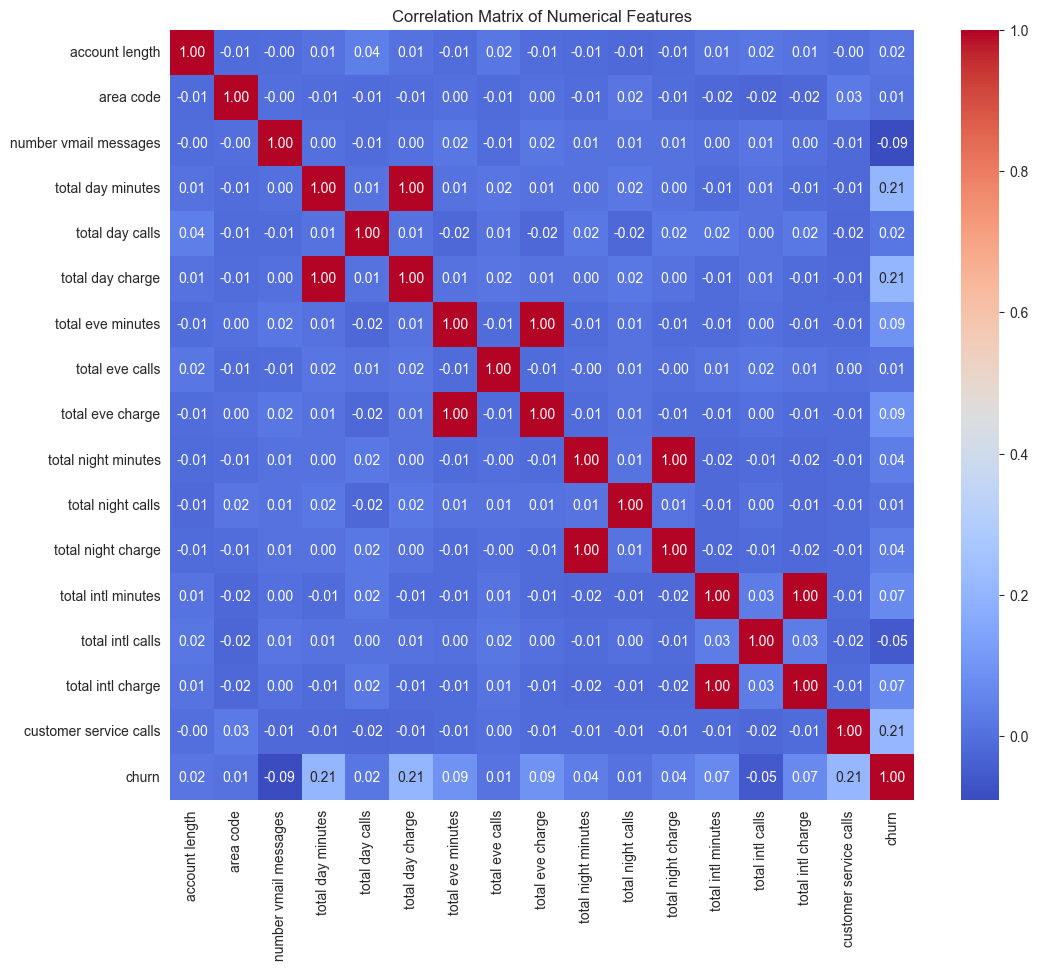

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix (already done, but recalculating for clarity)
correlation_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

CORRELATION MAP OBSERVATION:

The heatmap provides a visual representation of the Pearson correlation coefficients between all numerical features and the target variable 'churn'. Key observations include:

*   **Strong Positive Correlation with Churn**: Features like 'customer service calls', 'total day minutes', and 'total day charge' show noticeable positive correlations with 'churn'. This visually reinforces our earlier finding that higher values in these features are associated with an increased likelihood of churn.
*   **Weak Negative Correlation with Churn**: 'number vmail messages' displays a weak negative correlation with 'churn', suggesting that customers with more voicemail messages might be slightly less likely to churn.
*   **High Correlation Among Usage Features**: As expected, there are strong positive correlations between the 'total minutes', 'total calls', and 'total charge' within each time period (day, eve, night, intl). For example, 'total day minutes' and 'total day charge' are perfectly correlated, which makes sense as the charge is derived from the minutes used.
*   **Generally Weak Correlations with Other Features**: Most other numerical features show relatively weak linear correlations with 'churn' and with each other, indicating that they might contribute independently to the prediction or have non-linear relationships.


### **Inferential Statistics**

In [19]:
from scipy.stats import ttest_ind

# Separate data into churned and non-churned groups
churned = df[df['churn'] == True]
not_churned = df[df['churn'] == False]

# List of key numerical features to test
numerical_features = [
    'total day minutes',
    'total day charge', # Highly correlated with total day minutes, but good to test
    'customer service calls',
    'total eve minutes',
    'total eve charge',
    'total night minutes',
    'total night charge',
    'total intl minutes',
    'total intl charge',
    'account length',
    'number vmail messages',
    'total day calls',
    'total eve calls',
    'total night calls',
    'total intl calls',
]


print("Performing independent samples t-tests for key numerical features:\n")

for feature in numerical_features:
    # Perform the t-test
    # equal_var=False is often used when sample sizes or variances might differ
    t_stat, p_value = ttest_ind(churned[feature], not_churned[feature], equal_var=False, nan_policy='omit')

    print(f"Feature: {feature}")
    print(f"  T-statistic: {t_stat:.4f}")
    print(f"  P-value: {p_value:.4f}")

    # Interpret the p-value (using a significance level of 0.05)
    if p_value < 0.05:
        print("  Conclusion: Statistically significant difference in means between churned and non-churned customers.")
    else:
        print("  Conclusion: No statistically significant difference in means between churned and non-churned customers.")
    print("-" * 30)

Performing independent samples t-tests for key numerical features:

Feature: total day minutes
  T-statistic: 9.6846
  P-value: 0.0000
  Conclusion: Statistically significant difference in means between churned and non-churned customers.
------------------------------
Feature: total day charge
  T-statistic: 9.6845
  P-value: 0.0000
  Conclusion: Statistically significant difference in means between churned and non-churned customers.
------------------------------
Feature: customer service calls
  T-statistic: 8.9551
  P-value: 0.0000
  Conclusion: Statistically significant difference in means between churned and non-churned customers.
------------------------------
Feature: total eve minutes
  T-statistic: 5.2724
  P-value: 0.0000
  Conclusion: Statistically significant difference in means between churned and non-churned customers.
------------------------------
Feature: total eve charge
  T-statistic: 5.2720
  P-value: 0.0000
  Conclusion: Statistically significant difference in mean

In [22]:
#Reload the data to get the original categorical columns for Chi-square tests

from scipy.stats import ttest_ind, chi2_contingency

df = pd.read_csv('data/churn.csv')

# Drop the 'phone number' column from this temporary DataFrame as it's not needed and not categorical
df = df.drop('phone number', axis=1)


# List of categorical features to test against 'churn'
categorical_features = [
    'state',
    'area code',
    'international plan',
    'voice mail plan'
]

print("Performing Chi-square tests for categorical features vs. 'churn':\n")

for feature in categorical_features:
    # Create a contingency table using the original DataFrame
    contingency_table = pd.crosstab(df[feature], df['churn'])

    # Perform the Chi-square test
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

    print(f"Feature: {feature}")
    print(f"  Chi-square Statistic: {chi2_stat:.4f}")
    print(f"  P-value: {p_value:.4f}")

    # Interpret the p-value (using a significance level of 0.05)
    if p_value < 0.05:
        print("  Conclusion: Statistically significant association between the feature and churn.")
    else:
        print("  Conclusion: No statistically significant association between the feature and churn.")
    print("-" * 30)

Performing Chi-square tests for categorical features vs. 'churn':

Feature: state
  Chi-square Statistic: 83.0438
  P-value: 0.0023
  Conclusion: Statistically significant association between the feature and churn.
------------------------------
Feature: area code
  Chi-square Statistic: 0.1775
  P-value: 0.9151
  Conclusion: No statistically significant association between the feature and churn.
------------------------------
Feature: international plan
  Chi-square Statistic: 222.5658
  P-value: 0.0000
  Conclusion: Statistically significant association between the feature and churn.
------------------------------
Feature: voice mail plan
  Chi-square Statistic: 34.1317
  P-value: 0.0000
  Conclusion: Statistically significant association between the feature and churn.
------------------------------


INFERENTIAL STATISTICS OBSERVATION:

- T-tests revealed significant differences in mean values of key numerical features (e.g., total day minutes, total charges, customer service calls) between churned and non-churned customers.
- Chi-square tests showed strong associations between churn and categorical features like international plan, voice mail plan, and state.
- Features like account length, area code, and total call counts did not show statistically significant relationships with churn.
- These results confirm that usage behavior and certain service plans are important churn drivers, supporting both our EDA findings and modeling approach.

## **Data Preparation**

Let's begin the Data Preparation phase by checking for duplicate rows.